 Import Libraries and set required parameters
 ----------------------------------------------------------------

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import re
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore') 

In [110]:
#set style for seaborn plots
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
#Read Loan.csv
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

Data Understanding
-------

get the shape of the dataset
-------------------------------------------

In [111]:
#get the shape of the dataset
loan.shape

(39717, 111)

get standard calculations for dataset
-----------------------------------------------------

In [112]:
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Checking Null values ,axis= column
--------------------------------------------------------

In [113]:
#Checking Null values ,axis= column
loan.isnull().sum(axis=0)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


null values per column expressed as % of total number of values
----------------------------------------------------------------------------------------------

In [114]:
#null values per column expressed as % of total number of values
null_values = round(100*(loan.isnull().sum()/len(loan.id)), 2)
null_values.loc[null_values > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

List of Columns & NA counts where NA values are more than 30%
---------------------------------------------

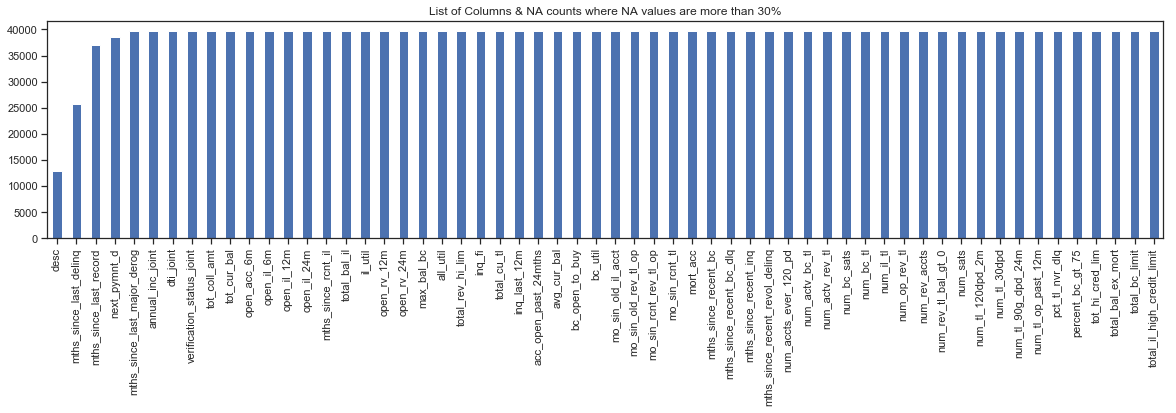

In [115]:
#List of Columns & NA counts where NA values are more than
null_values = loan.isnull().sum()
null_values = null_values[null_values.values >(0.3*len(loan))]
plt.figure(figsize=(20,4))
null_values.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

So we can see from the above plot that there are 50+ columns in the dataset where all the values are NA.
----------

In [116]:
#null values per column expressed as % of total number of values
null_values = round(100*(loan.isnull().sum()/len(loan.id)), 2)
null_values.loc[null_values > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

columns that have 30-100% missing values
--------------------------------------------------------------

In [117]:
#columns that have 30-100% missing values.
columns_with_missing_values = list(null_values[null_values >= 30].index)
len(columns_with_missing_values)

58

after removal of NA columns ,get the shape
------------------------------------------------------------------

In [118]:
#Let's remove columns which are having 30-100% null values
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 53)

null values per column expressed as % of total number of values
---------------------------------------------------------------------------------------------

In [119]:
#null values per column expressed as % of total number of values
null_values = round(100*(loan.isnull().sum()/len(loan.id)), 2)
null_values.loc[null_values > 0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

(Note:For Rows: NA columns has already been removed, so we may not find any rows where 30% values are NA),

Remove columns where number of unique value is only 1.
----

In [120]:
unique = loan.nunique()
unique = unique[unique.values == 1]

In [121]:
loan.drop(labels = list(unique.index), axis =1, inplace=True)
loan.shape

(39717, 44)

PUB_REC_BANKRUPTIES:
Lets count all values occurences 

In [122]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

pub_rec_bankruptcies column is having only 3 values i.e 0,1,2

In [123]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [124]:
#As Compared to number of occurences of 0.0 ,value occurences of  1 and 2 are pretty less.
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [125]:
#now emp_title and emp_length has 6 % and 2% respectively null values
#removing null values of emp_title and emp_length
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

EMP_LENGTH :------------------
-----------------------
Remove 'n/a' value with 'self-employed'.
There are some values in emp_term which are 'n/a', we assume that are 'self-employed'. Because for 'self-employed' applicants, emp-lenth is 'Not Applicable'

In [126]:
print(loan.emp_length.unique())
loan.emp_length.fillna('0',inplace=True)
loan.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(loan.emp_length.unique())

['< 1 year' '10+ years' '1 year' '3 years' '8 years' '9 years' '5 years'
 '4 years' '6 years' '2 years' '7 years']
['< 1 year' '10+ years' '1 year' '3 years' '8 years' '9 years' '5 years'
 '4 years' '6 years' '2 years' '7 years']


According to the data_dictionary file description for this field,emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year or self employed and 10 means ten or more years.Let's convert the column to have values between 0 and 10.

In [127]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [128]:
loan = loan.replace({"emp_length": emp_length_dict })

updated emp_length Values

In [129]:
loan.emp_length.value_counts()

10    8417
2     4189
0     4071
3     3925
4     3312
5     3144
1     3042
6     2126
7     1701
8     1410
9     1211
Name: emp_length, dtype: int64

In [130]:
loan.shape

(36548, 44)

In [131]:
#check null and round of percentages uptp 2 decimal places
null_values = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
null_values[null_values != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [132]:
#Let's remove the rows with null value for title,revol_util,last_payment_d variables.
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

In [133]:
loan.shape

(36433, 44)

Some columns we can check in loan.csv and take a reference help from data dictionary:-
-----------------------------

id :
is a random number given to the loan, does not contribute to analysis

member_id :
is a random number given to the member, does not contribute to analysis

url :
is a URL for LC page for corresponding to each memberid, nothing to do with loan default.

zip_code :
first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis

funded_amnt :
value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.

funded_amnt_inv :
value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.
Dropping the above columns from the clean_loan dataframe.

In [134]:
#Dropping the above columns from the updated_loan dataframe.
drop_columns = ['id','member_id','funded_amnt','funded_amnt_inv','url','zip_code']
loan= loan.drop(drop_columns,axis=1)

In [135]:
loan.shape

(36433, 38)

Next, let's standardize the precision of the data, There are certain columns with need rounding of the values up until two decimal places.

These columns are:total_pymnt,total_rec_late_fee, collection_recovery_fee
-----

In [136]:
loan.total_pymnt.value_counts().tail()

5517.160000     1
12878.238670    1
4348.288927     1
8954.809409     1
4608.000000     1
Name: total_pymnt, dtype: int64

In [137]:
loan.total_rec_late_fee.value_counts().tail()

29.914662    1
23.820000    1
15.610000    1
59.781000    1
14.944409    1
Name: total_rec_late_fee, dtype: int64

In [138]:
loan.collection_recovery_fee.value_counts().tail()

18.3264     1
198.4078    1
9.6738      1
33.2896     1
93.3678     1
Name: collection_recovery_fee, dtype: int64

In [139]:
loan.total_pymnt= round(loan.total_pymnt,2)
loan.total_rec_late_fee= round(loan.total_rec_late_fee,2)
loan.collection_recovery_fee= round(loan.collection_recovery_fee,2)

In [140]:
#Dropping Duplicated rows if any,
loan=loan.drop_duplicates()

Next, there are few columns expressing % like int_rate and revol_util,These has values in decimals,
Further these columns has dtype as 'object'. Let's convert these columns to have just the value withoout '%' and typecast it to float.

In [141]:
loan.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [142]:
loan.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [143]:
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

In [144]:
loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
int_rate      36433 non-null float64
revol_util    36433 non-null float64
dtypes: float64(2)
memory usage: 853.9 KB


Cast 'loan_amnt','installment','int_rate','annual_inc','dti'
------------
---continuos variables to numeric so that we can find a correlation between them


In [145]:
numeric_columns = ['loan_amnt','installment','int_rate','annual_inc','dti']
loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

PURPOSE------------------------
----

Purpose of loan : Drop records where values are less than 0.75%
We will analyse only those categories which contain more than 0.75% of records.

In [146]:
(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation    47.951033
credit_card           12.971756
other                  9.812533
home_improvement       7.424588
major_purchase         5.511487
car                    3.960695
small_business         3.881097
wedding                2.431861
medical                1.740181
moving                 1.451980
house                  0.941454
vacation               0.922241
educational            0.757555
renewable_energy       0.241539
Name: purpose, dtype: float64

In [147]:
del_loan_purpose = (loan.purpose.value_counts()*100)/len(loan)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75)]

loan.drop(labels = loan[loan.purpose.isin(del_loan_purpose.index)].index, inplace=True)


print(loan.purpose.unique())

['car' 'other' 'wedding' 'debt_consolidation' 'credit_card'
 'home_improvement' 'major_purchase' 'medical' 'moving' 'small_business'
 'vacation' 'house' 'educational']


In [148]:
loan.shape

(36345, 38)

In [149]:
loan.emp_title.value_counts()

US Army                                     130
Bank of America                             108
IBM                                          66
AT&T                                         59
Kaiser Permanente                            55
Wells Fargo                                  54
USAF                                         53
UPS                                          52
US Air Force                                 51
Lockheed Martin                              44
Walmart                                      43
U.S. Army                                    41
State of California                          40
United States Air Force                      40
Verizon Wireless                             40
USPS                                         39
US ARMY                                      38
JP Morgan Chase                              37
Department of Defense                        36
Walgreens                                    36
JPMorgan Chase                          

EMP_TITLE---------------------------
---

emp_title has lot many  enties:

this data won’t be meaningful and bit of stretch for plotting a chart
and any relationship we might observe might be due to confounding relationships

In [150]:
loan.drop(['emp_title'],1, inplace=True)

In [151]:
loan.shape

(36345, 37)

In [152]:
loan.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       13
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     333
earliest_cr_line             510
total_rec_late_fee           713
loan_amnt                    863
out_prncp                   1063
out_prncp_inv               1064
revol_util                  1082
collection_recovery_fee     1936
dti                         2857
recoveries                  3571
annual_inc                  4915
total_rec_prncp             7235
installmen

In [153]:
loan.shape

(36345, 37)

Derived Metrics-----------------------------
----

Loan amount to Annual Income ratio-----------------------
---

In [154]:
loan['loan_income_ratio']= loan['loan_amnt']/loan['annual_inc']

Next, there are few columns which denote date or month information but are of the type object in the dataframeLets change the dtype of all such columns to datetime. Doing so will helpin further using these column values to its best for analysis columns are:  issue_d ,earliest_cr_line ,last_pymnt_d,last_credit_pull_d

In [155]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36345 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36345 non-null object
earliest_cr_line      36345 non-null object
last_pymnt_d          36345 non-null object
last_credit_pull_d    36345 non-null object
dtypes: object(4)
memory usage: 1.4+ MB


In [156]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

In [157]:
loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36345 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36345 non-null datetime64[ns]
earliest_cr_line      36345 non-null datetime64[ns]
last_pymnt_d          36345 non-null datetime64[ns]
last_credit_pull_d    36345 non-null datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


Extract Year & Month from Issue date

In [158]:
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

earliest_cr_line: The month the borrower's earliest reported credit line was openedLet's split the date column into earliest_cr_line_month and earliest_cr_line_yearLets split the available date into month and year column.

In [159]:
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year

In [160]:
len(loan[loan['earliest_cr_line_year'] > 2011 ])

49

We see that there are 50 records with the earliest credit line date greater than 2011(which is the max range of the data we have)Lets see the data to understand why.

In [161]:
loan[loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2054, 2064],
      dtype=int64)

This seems to be a result of y2k like errorYear stored in two digits being interpreted as year in 21st century. Let's fix the entries

In [162]:
loan.loc[loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan['earliest_cr_line_year'] - 100

In [163]:
loan.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       1
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      89
1978     129
1979     140
1980     150
1981     154
1982     196
1983     296
1984     360
1985     405
1986     447
1987     564
1988     668
1989     779
1990     939
1991     881
1992     966
1993    1391
1994    1855
1995    1968
1996    2068
1997    2266
1998    2635
1999    2757
2000    3031
2001    2358
2002    1790
2003    1740
2004    1638
2005    1404
2006    1076
2007     668
2008     142
Name: loan_amnt, dtype: int64

TERM: The number of payments on the loan. Values are in months and can be either 36 or 60removing the months string from within the column term.

In [164]:
loan.term.value_counts()

 36 months    26313
 60 months    10032
Name: term, dtype: int64

In [165]:
loan['term'] = loan.term.apply(lambda x: x.split()[0])

In [166]:
loan.term.value_counts()

36    26313
60    10032
Name: term, dtype: int64

Change order of months from Jan to Dec, currently it's in alphabetical order(A-Z)


In [167]:
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan['issue_d_month'] = pd.Categorical(loan['issue_d_month'],categories=months_order, ordered=True)

In [168]:
loan['issue_d_year'].value_counts

<bound method IndexOpsMixin.value_counts of 1        2011
3        2011
4        2011
5        2011
6        2011
7        2011
9        2011
10       2011
11       2011
12       2011
13       2011
14       2011
15       2011
16       2011
17       2011
18       2011
19       2011
20       2011
21       2011
22       2011
23       2011
24       2011
25       2011
27       2011
28       2011
29       2011
31       2011
32       2011
33       2011
34       2011
         ... 
38995    2008
38996    2008
38997    2008
38998    2008
38999    2008
39000    2008
39001    2008
39002    2008
39003    2008
39013    2008
39052    2008
39084    2008
39138    2008
39216    2008
39220    2008
39251    2008
39288    2008
39291    2008
39346    2008
39348    2008
39362    2008
39425    2008
39430    2008
39433    2008
39475    2007
39551    2007
39562    2007
39623    2007
39666    2007
39680    2007
Name: issue_d_year, Length: 36345, dtype: int64>

Create Bins for range of Loan Amount
--

In [169]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

In [170]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'loan_income_ratio',
       'issue_d_month', 'issue_d_year', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'loan_amnt_range'],
      dtype='object')

## Removing columns which are irrevalent according to the business understanding  

In [171]:
cols_to_remove = ['out_prncp','out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp','total_rec_int', 'total_rec_late_fee', 'recoveries',
                   'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt']
loan = loan.drop(cols_to_remove,axis=1)

In [172]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'loan_income_ratio', 'issue_d_month',
       'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year',
       'loan_amnt_range'],
      dtype='object')

Univariate Analysis--------------
-----

Continuous Variables
In case of continuous variables, we need to understand the central tendency and spread of the variable.These are measured using various statistical metrics visualization methods such as Boxplot,Histogram/Distribution Plot, Violin Plot etc.

Categorical Variables
For categorical variables, we’ll use frequency table to understand distribution of each category. It can be be measured using two metrics, Count and Count% against each category. Countplot or Bar chart can be used as visualization.

In [173]:
def showPlots(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [174]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showPlots(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [175]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [176]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showPlots(ax)
    plt.subplot(1, 2, 2)
    values = (loan.loc[loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showPlots(ax)

UDF :: univariate_analysis(df,col,vartype,hue)

univariate_analysis function will plot the graphs based on the parameter values

In [177]:
def univariate_analysis(df,col,vartype,hue =None):
    
    '''
    univariate_analysis function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

Continuous Variables
--------

Loan Amount
----------

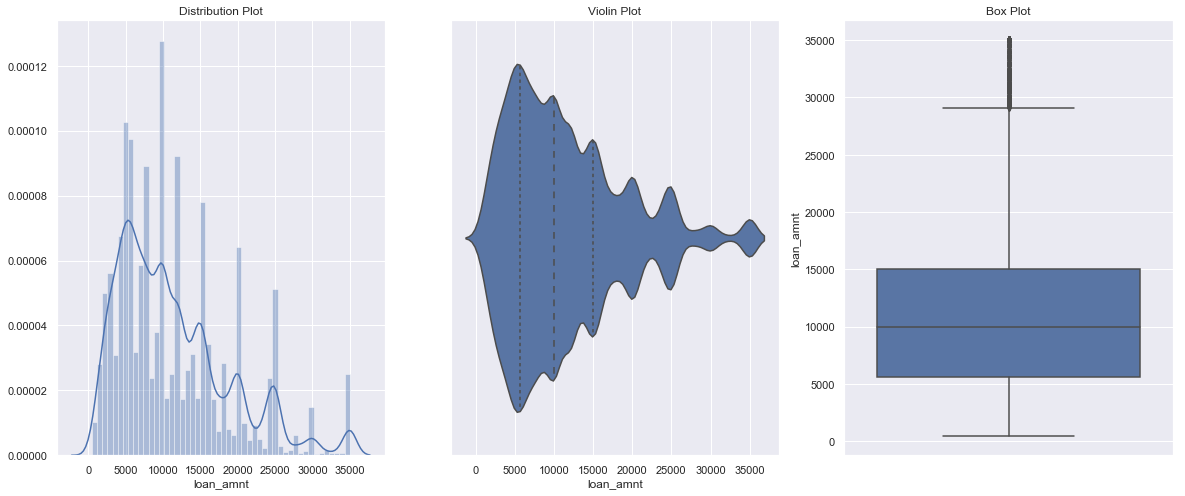

In [178]:
univariate_analysis(df=loan,col='loan_amnt',vartype=0)

Insights: Most of the loan amounts are distributed between 8000 to 20000 USD.
------------

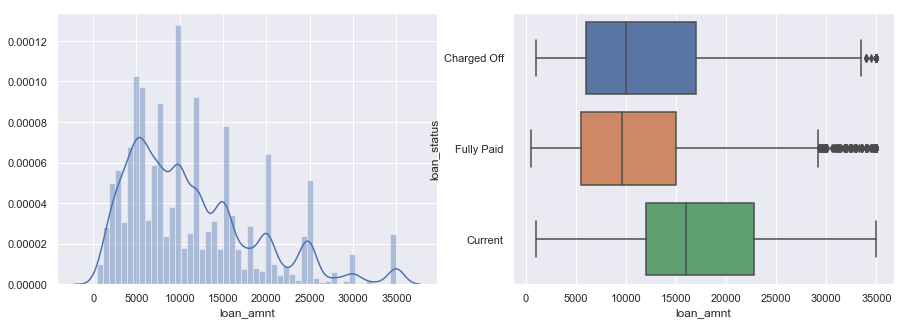

In [179]:
plot_distribution(loan, 'loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
----------

In [180]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4928.0,12294.587054,8064.560838,1000.0,6000.0,10000.0,17000.0,35000.0
Current,1065.0,17091.408451,8569.742979,1000.0,12000.0,16000.0,22800.0,35000.0
Fully Paid,30352.0,10951.170434,7181.635832,500.0,5500.0,9600.0,15000.0,35000.0


Insight:
---------
Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)Funding amounts see a spike around each 5000 boundary.
--------
Charged off loans are shifted towards higher average loan amount request.
--------

In [181]:
#Create Derived categorical variable
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

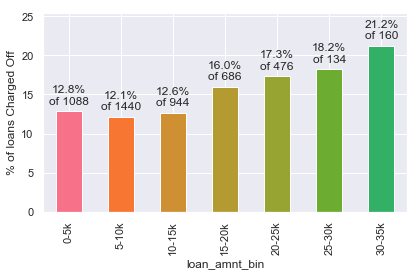

In [182]:
plotLoanStatus(loan, 'loan_amnt_bin')

Insight:The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default.
------------

int_rate--------
-----------

Interest Rate on the loan.
------

In [183]:
loan['int_rate'].describe()

count    36345.000000
mean        12.075140
std          3.734218
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.110000
Name: int_rate, dtype: float64

<Figure size 1080x360 with 0 Axes>

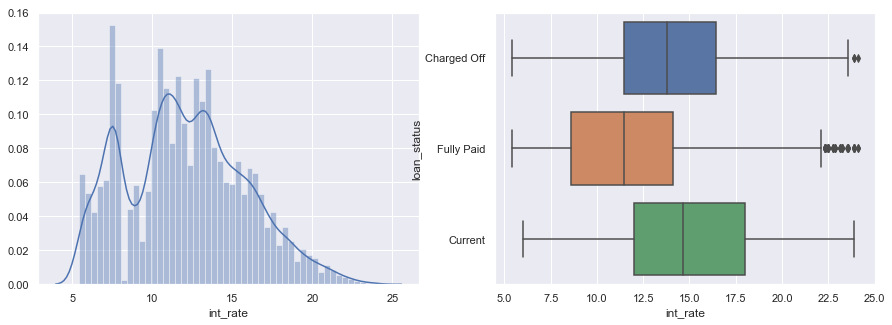

In [184]:
plt.figure(figsize=(15,5))
plot_distribution(loan, 'int_rate')

Annual Income
-----

In [185]:
loan["annual_inc"].describe()

count    3.634500e+04
mean     6.927083e+04
std      6.347074e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Max value is 6.000000e+06 which is approx 88 times more than mean value,so we will remove the outliers from Annual IncomeRemove outliers from 68%
-----------

In [186]:
q = loan["annual_inc"].quantile(0.68)
loan = loan[loan["annual_inc"] < q]
loan["annual_inc"].describe()

count    24510.000000
mean     47243.319622
std      14931.147261
min       4000.000000
25%      36000.000000
50%      48000.000000
75%      60000.000000
max      74999.000000
Name: annual_inc, dtype: float64

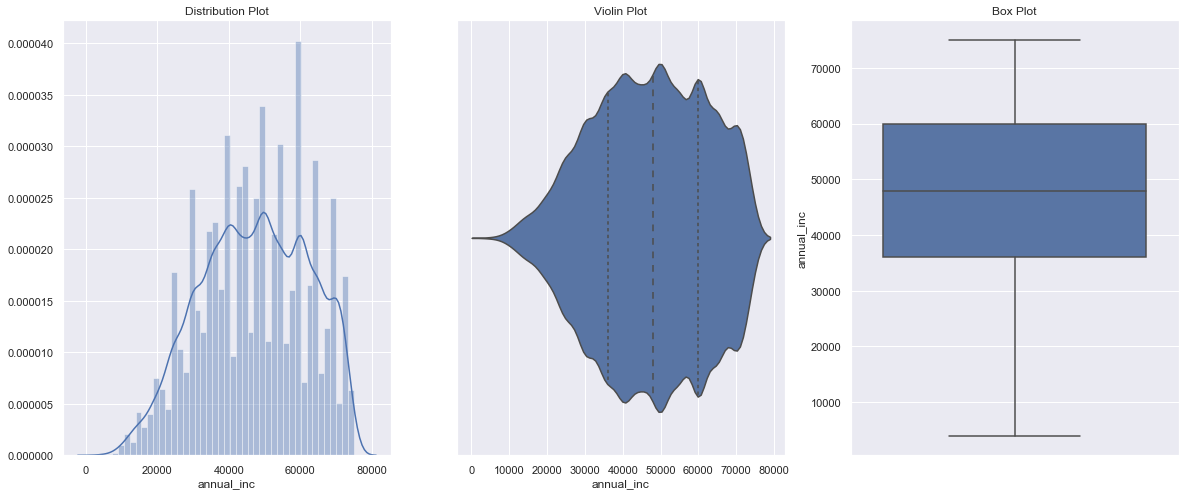

In [187]:
univariate_analysis(df=loan,col='annual_inc',vartype=0)

Insights: Most of the applicants earns beteen 40000 to 90000 USD annually.

Categorical Variables
---------

Loan Status
---

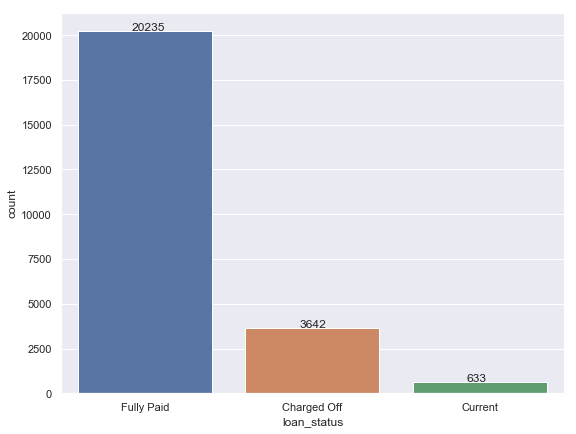

In [188]:
univariate_analysis(df=loan,col='loan_status',vartype=1)

Insight: approx 15% of the applicants Charged off.
---

Purpose of loan
--------

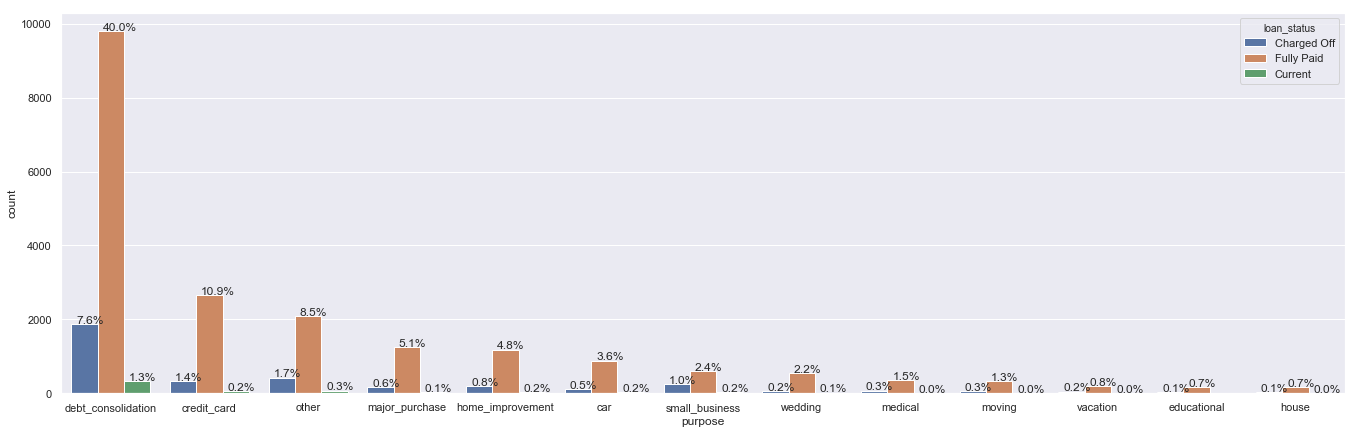

In [189]:
univariate_analysis(df=loan,col='purpose',vartype=1,hue='loan_status')

Insights: Approx 50% of the applicants applied loan for paying their other loans(Debt Consolidation).
---------


Home Ownership wise Loan
------

In [190]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [191]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
remove_own = ['OTHER']
loan.drop(loan[loan['home_ownership'].isin(remove_own)].index,inplace=True)
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

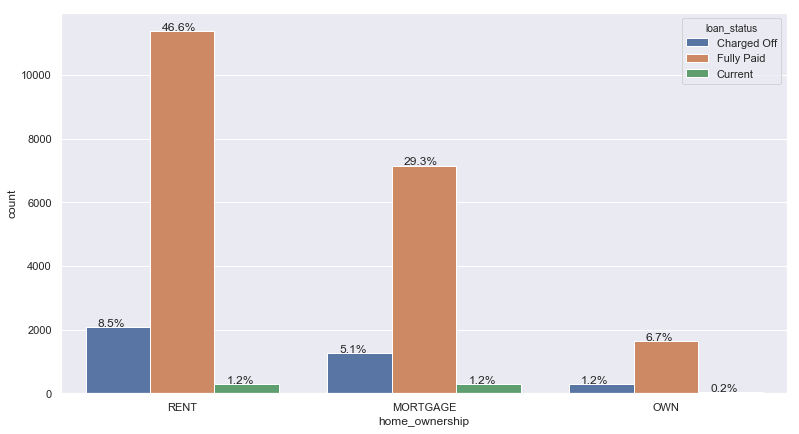

In [192]:
univariate_analysis(df=loan,col='home_ownership',vartype=1,hue='loan_status')

Insights: approx 56% of applicants are living in rented home whereas 52% applicants were mortagaged their home.
---

Year wise Loan
---

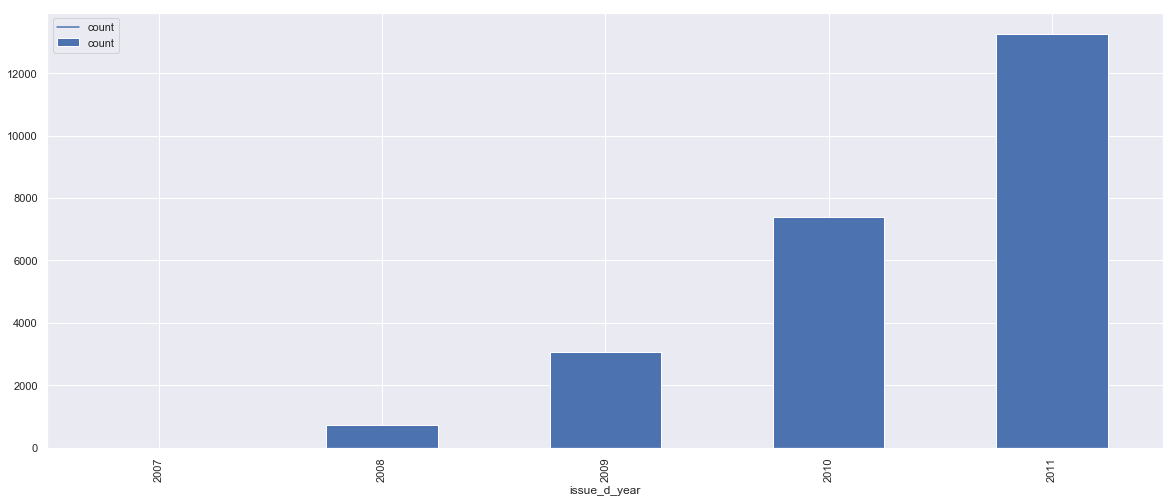

In [193]:
year_wise =loan.groupby(by= [loan.issue_d_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

Insight: loan applicants are increasing year on year, approx 13000 of loan applicants received loans in 2011.
-----


Term
-----

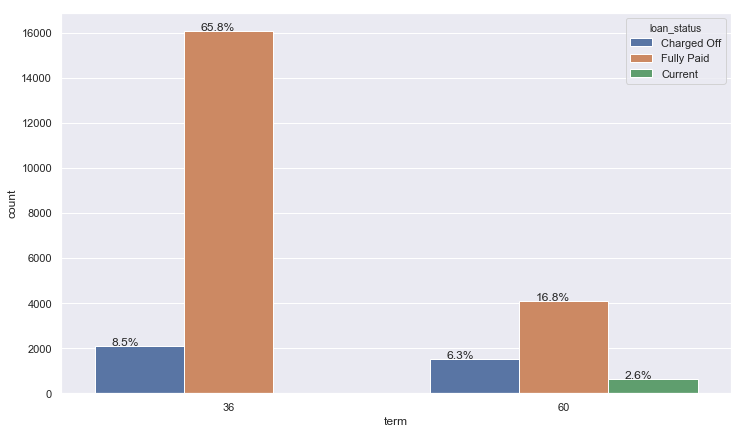

In [194]:
univariate_analysis(df=loan,col='term',vartype=1,hue='loan_status')

Insight: approx 74% of applicants applied loan for 36 months term period.
----


Let's see if some of these variables follow the famous power law

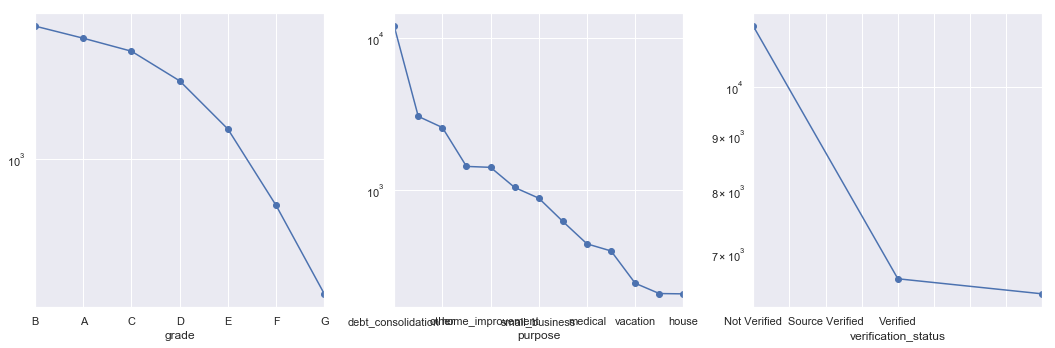

In [195]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
loan.groupby('grade').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 2)
loan.groupby('purpose').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 3)
loan.groupby('verification_status').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.tight_layout()

----------------------------------------------------------
pub_rec_bankruptcies---
-----

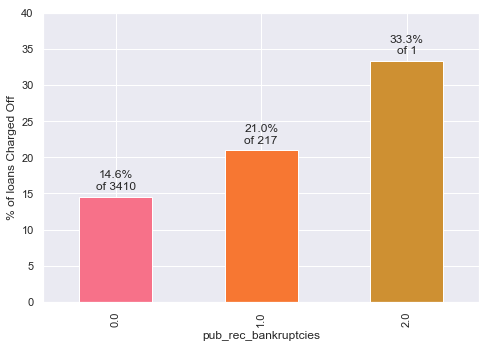

In [196]:
plt.figure(figsize=(7,5))
plotLoanStatus(loan, 'pub_rec_bankruptcies')

----------------------------------------------------------
installment---
----

In [197]:
loan.installment.describe()


count    24447.000000
mean       276.646676
std        168.238943
min         16.080000
25%        153.190000
50%        245.350000
75%        366.875000
max       1230.850000
Name: installment, dtype: float64

<Figure size 1080x360 with 0 Axes>

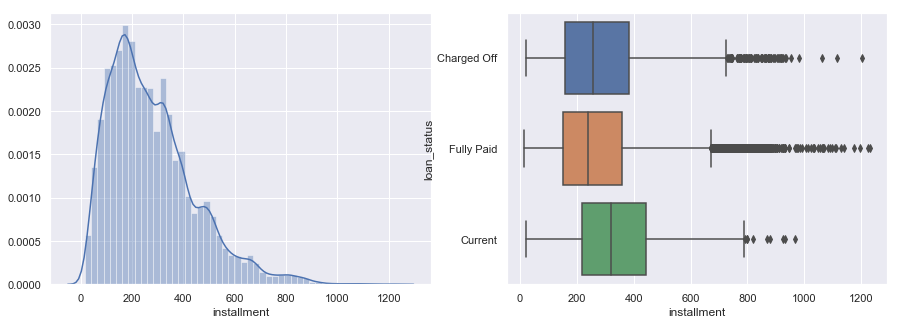

In [198]:
plt.figure(figsize=(15,5))
plot_distribution(loan, 'installment')

grade and sub_grade
------

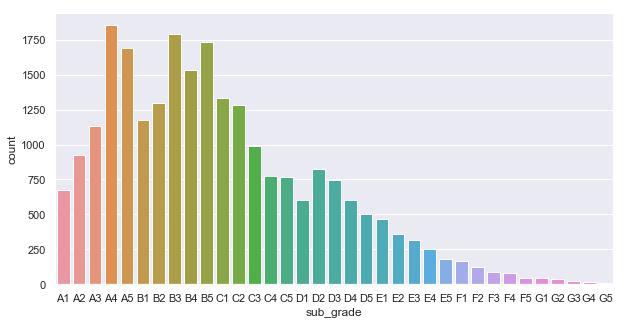

In [199]:
plt.figure(figsize=(10,5))
sns.countplot(loan['sub_grade'], order=sorted(loan.sub_grade.unique()))
plt.show()

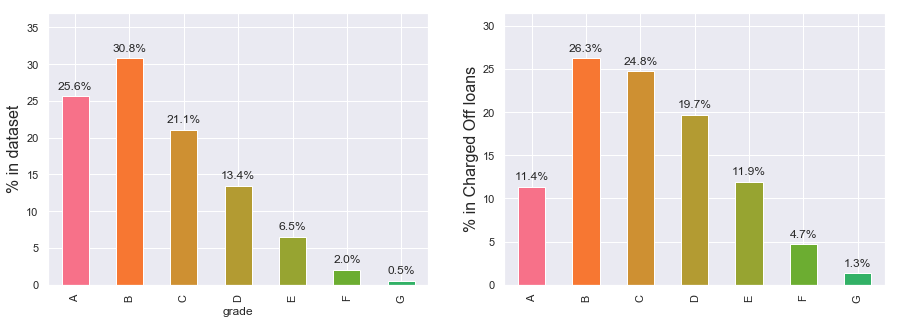

In [200]:
plt.figure(figsize=(15,5))
plot_percentages(loan, 'grade',True)

Insights:Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.Grade D, E, F, G loans are less safe.Lending Clubs grading system is working well.
----------

Grade E onwards are risky, and less numerous.
-----

------------------------------------------
emp_length----
------

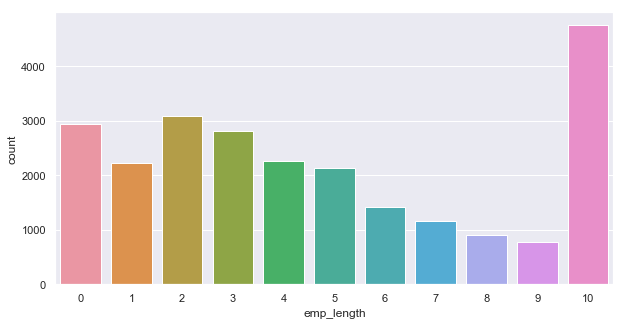

In [201]:
plt.figure(figsize=(10,5))
sns.countplot(loan['emp_length'], order=sorted(loan.emp_length.unique()))
plt.show()

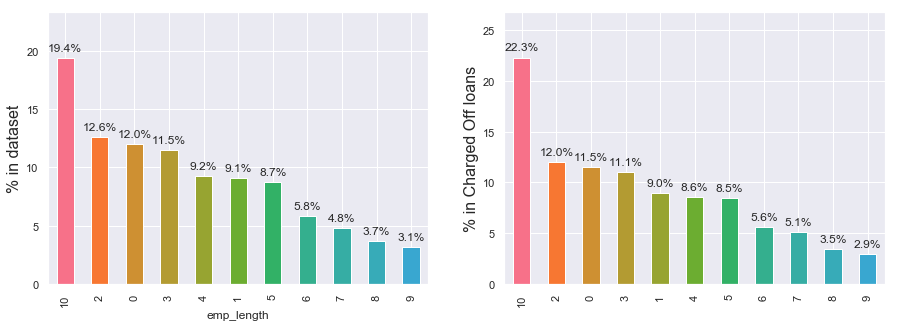

In [202]:
plt.figure(figsize=(15, 5))
plot_percentages(loan, 'emp_length')

Insight:19.4% of the of loan taker have an employment length of more than 10 years.
-----

verification_status-----
-----------

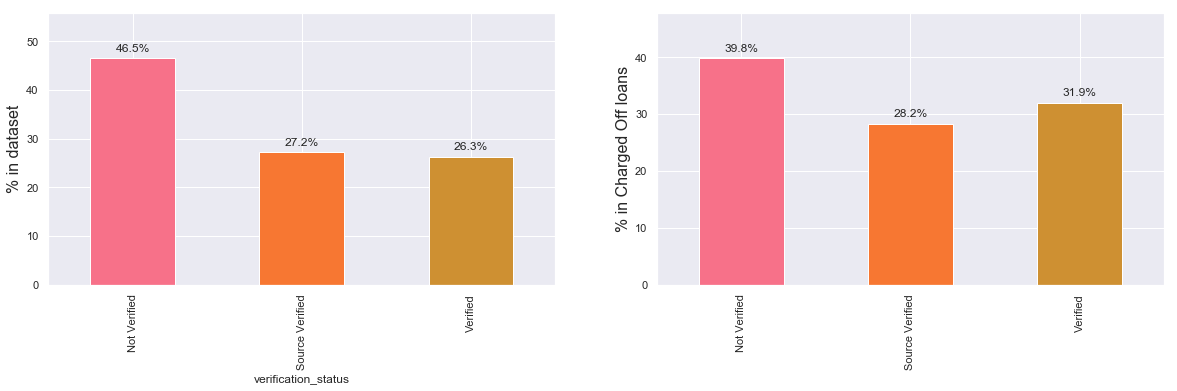

In [203]:
plt.figure(figsize=(20,5))
plot_percentages(loan, 'verification_status', True)

Insights:
Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.
This is unexpected and will be investigated later in bivariate analysis

--------------------------------------
addr_state---
---------

In [204]:
loan.addr_state.value_counts(normalize=True).head(10)

CA    0.169960
NY    0.093713
FL    0.078128
TX    0.065693
NJ    0.043891
PA    0.041641
IL    0.039146
GA    0.035587
OH    0.034974
MA    0.032028
Name: addr_state, dtype: float64

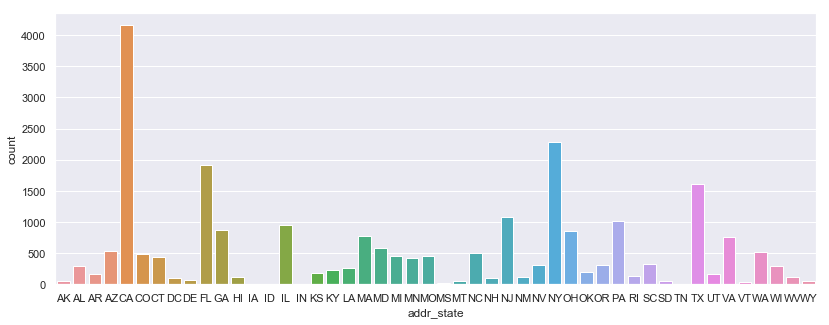

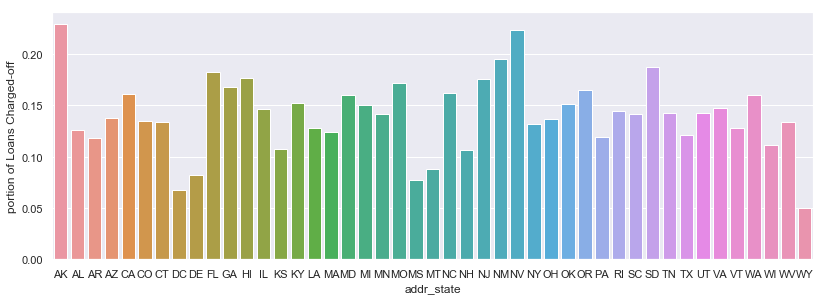

In [205]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(loan['addr_state'], order=sorted(loan.addr_state.unique()))

#Fraction of loans charged off and fully Paid
charge_off_count = loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
#plt.subplot(1, 2, 2)
#b=sns.barplot(x=Fully_paid_count.index, y=Fully_paid_count.values)
#b.set_ylabel('portion of Loans Fully Paid')
plt.show()

 Insight:Maximum loans 22% are from NV following that is 21% from NM state and TN 20% and  Florida with 19%. This is to be expected as these are also the three most populous US statesStates with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and should be ignored. Overall, this variable does not affect propensity to default.
---------


------------------------------------------------
dti---
------
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan,  divided by the borrower’s self-reported monthly income.
-----

In [206]:
loan['dti'].describe()

count    24447.000000
mean        13.990274
std          6.710915
min          0.000000
25%          8.900000
50%         14.280000
75%         19.400000
max         29.990000
Name: dti, dtype: float64

Text(0.5, 1.0, 'Debt-to-income Ratio')

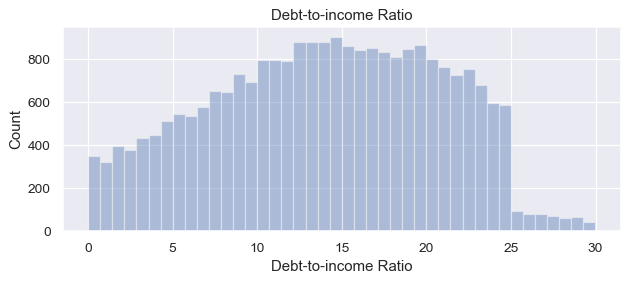

In [207]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(loan.loc[loan['dti'].notnull() & (loan['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

<Figure size 720x360 with 0 Axes>

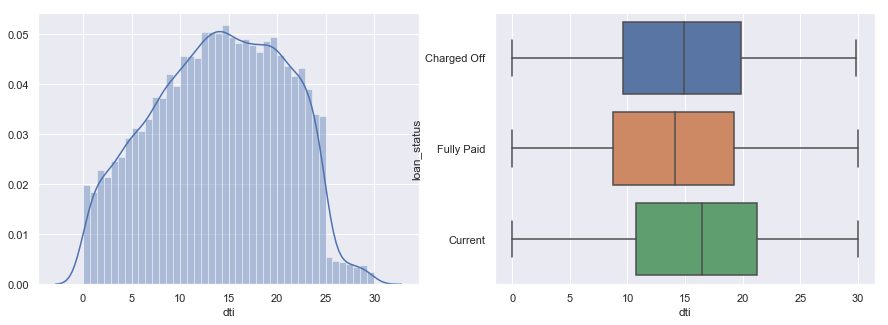

In [208]:
plt.figure(figsize=(10,5))

plot_distribution(loan, 'dti')

In [209]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(loan.loc[loan[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(loan[col_name], order=sorted(loan[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=loan, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = loan.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

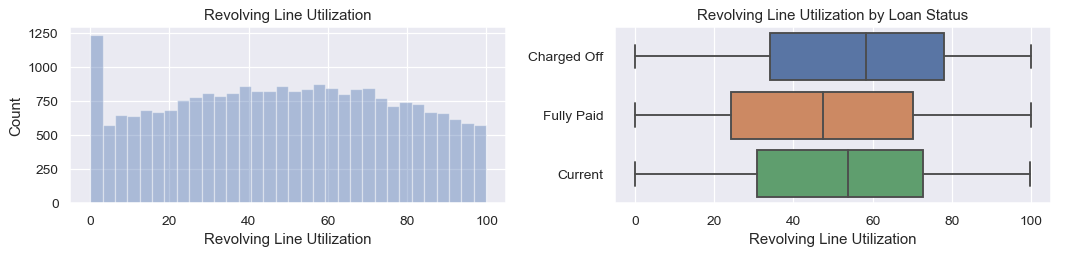

In [210]:
plot_var('revol_util', 'Revolving Line Utilization', continuous=True)

delinq_2yrs-----
----

In [211]:
loan.delinq_2yrs.value_counts(normalize=True)

0     0.898556
1     0.078210
2     0.015298
3     0.005604
4     0.001309
5     0.000409
6     0.000327
7     0.000164
8     0.000082
11    0.000041
Name: delinq_2yrs, dtype: float64

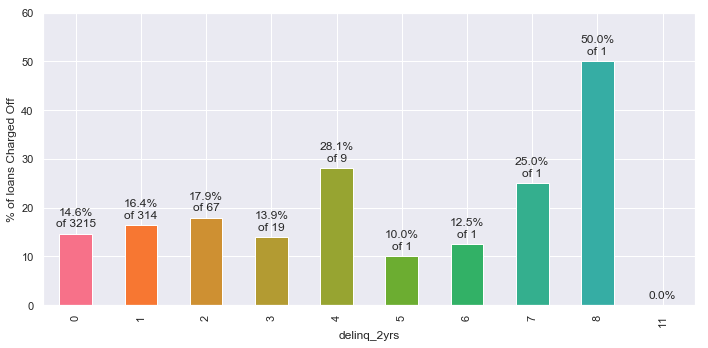

In [212]:
plt.figure(figsize=(10,5))
plotLoanStatus(loan, 'delinq_2yrs')

Insight:The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.There are higher chances of default if this variable is greater than 1
--------

------------------------------------------------------
earliest_cr_line:-----
----
The month the borrower's earliest reported credit line was opened.
-----

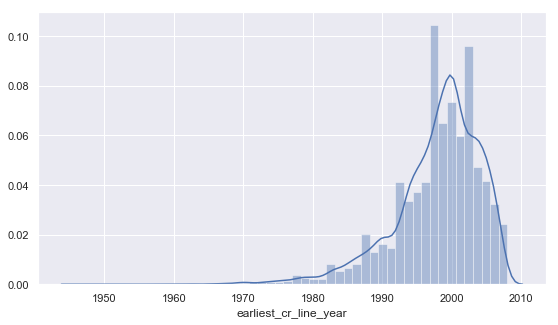

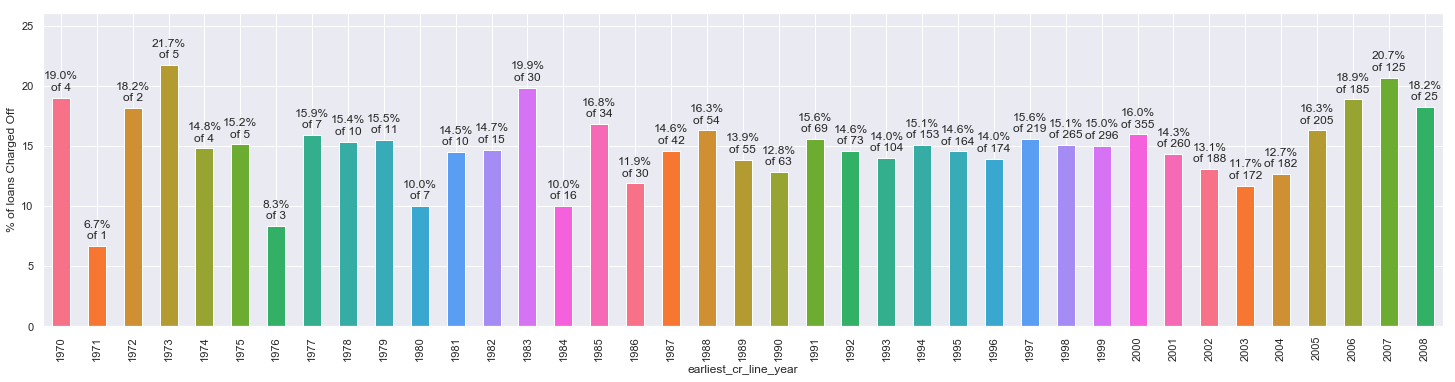

In [213]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.distplot(loan['earliest_cr_line_year'])
plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
plotLoanStatus(loan.loc[loan['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()

Insight:Newer borrowers are defauling more often. 
----

------------------------------------------
inq_last_6mths---
---
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
-----

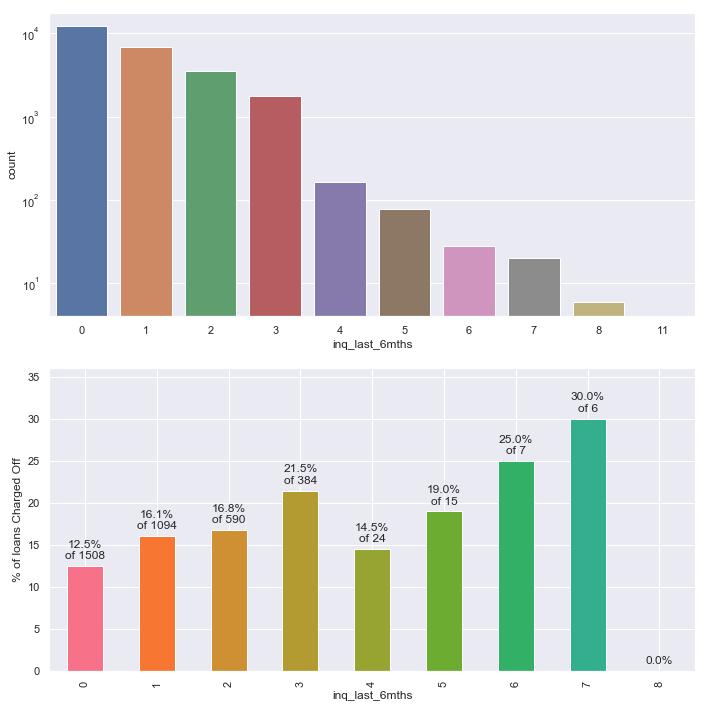

In [214]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(loan['inq_last_6mths'], order=sorted(loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(2, 1, 2)
plotLoanStatus(loan, 'inq_last_6mths')
plt.show()

Insight:
----
Those with more than 2 inquiries default at higher rates.This is probably correlated to having more loans and can be ignored. The revolving line utilization will cover this.
------

--------------------------------------------------
open_acc---
----

<Figure size 1080x360 with 0 Axes>

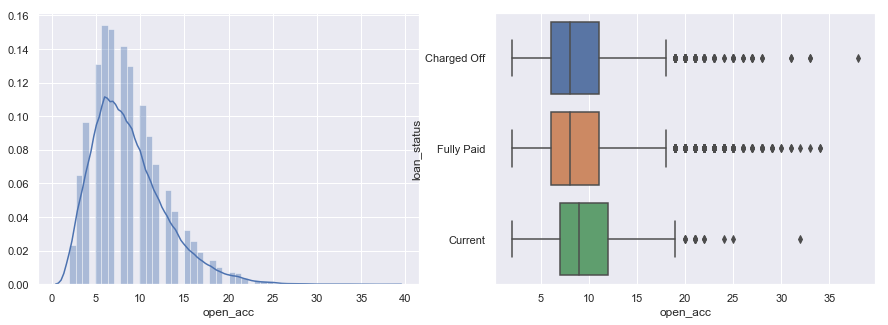

In [215]:
plt.figure(figsize=(15,5))
plot_distribution(loan, 'open_acc')
plt.show()

---------------------------------------------
Bivariate/Multivariate Analysis
---

Bivariate/Multivariate Analysis finds out the relationship between two/two or more variables.We can perform Bivariate/Multivariate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

Purpose of Loan vs Loan Amount for each Loan Status
----

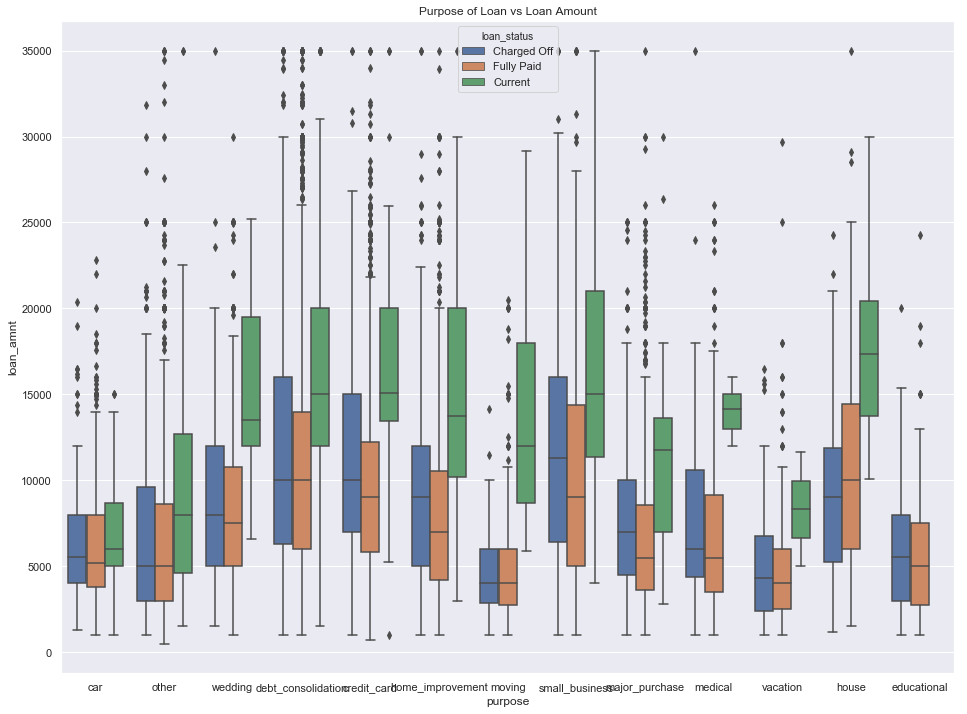

In [216]:
plt.figure(figsize=(16,12))
sns.boxplot(data =loan, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

Correlation Matrix : All Continuos(Numeric) Variables
-----

In [217]:
loan_correlation = loan[numeric_columns].corr()
loan_correlation

,loan_amnt,installment,int_rate,annual_inc,dti
loan_amnt,1.000000,0.927363,0.246241,0.349971,0.136481
installment,0.927363,1.000000,0.226522,0.340984,0.120915
int_rate,0.246241,0.226522,1.000000,0.028665,0.082004
annual_inc,0.349971,0.340984,0.028665,1.000000,0.015275
dti,0.136481,0.120915,0.082004,0.015275,1.000000


HeatMap: All continuos variables
-----

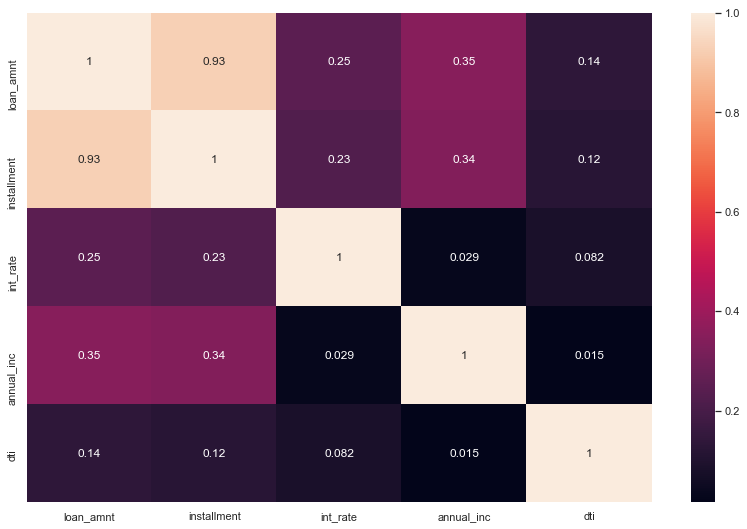

In [218]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

--------------------------------------------------------------------------------
Employment Length vs Loan Amount for different pupose of Loan----
-----

In [219]:
loanstatus=loan.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=loan.loc[loan['loan_status']=='Charged Off']

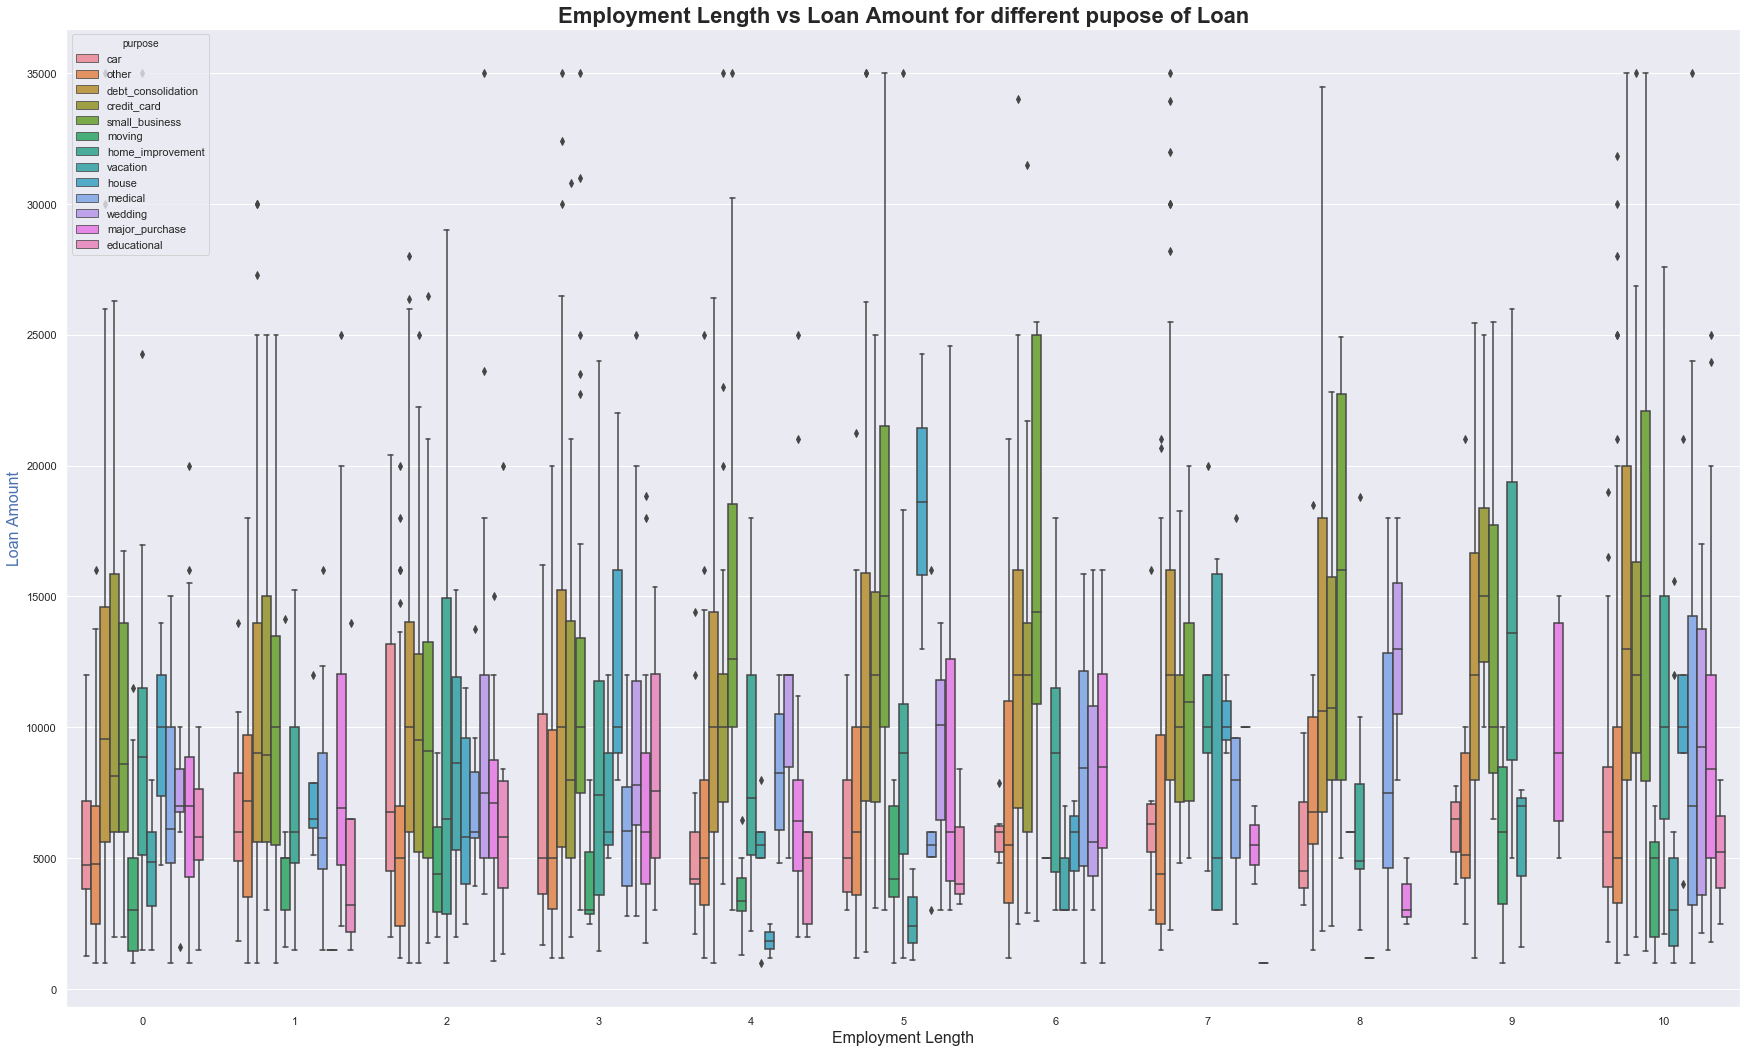

In [220]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

-----------------------------------------------------------------

Bivariate/Multivariate Analysis with Probability of Charge off
----------

Categorical Variables vs Probability of Charged Off
The main motive of this use case to find what parameters are impacting the most on Loan Status that is if a applicant will successfully complete the loan term or will charge off.

So we will be using a new term now Probability of Charged Off that will be equal to :

ProbabilityofChargedOff=NumberofApplicantswhochargedoffTotalNo.ofApplicants
 
We will calculate this probability w.r.t each column in bivariate analysis & will see how the Probability of Charged Off changes with these columns.

We will create a user defined function for this.

UDF: func

'func' function will be used to get the summarized table for each column(passed as a variable) along with probability of charge off w.r.t that column.¶


In [221]:
def func(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    func = pd.crosstab(df[col], df['loan_status'],margins=True)
    func['Probability_Charged Off'] = round((func['Charged Off']/func['All']),3)
    func = func[0:-1]
    return func

UDF: bivariate_analysis
'bivariate_prob' function will be used to plot count of values for each column(passed as a variable) stacked across 'loan_status' along with probability of charged off as a line chart.

In [222]:
# Probability of charge off
def bivariate_analysis(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotfunc = func(df,col)
    
    linePlot = plotfunc[['Probability_Charged Off']]      
    barPlot =  plotfunc.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

Location vs Probability Charge 
----

In [223]:
filter_states = loan.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = loan.drop(labels = loan[loan.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
addr_state,,,,,
NH,10,3,81,94,0.106
NJ,188,27,858,1073,0.175
NM,24,2,97,123,0.195
NV,69,12,228,309,0.223
NY,302,67,1922,2291,0.132
OH,117,31,707,855,0.137
OK,31,8,166,205,0.151
OR,51,8,250,309,0.165
PA,121,32,865,1018,0.119


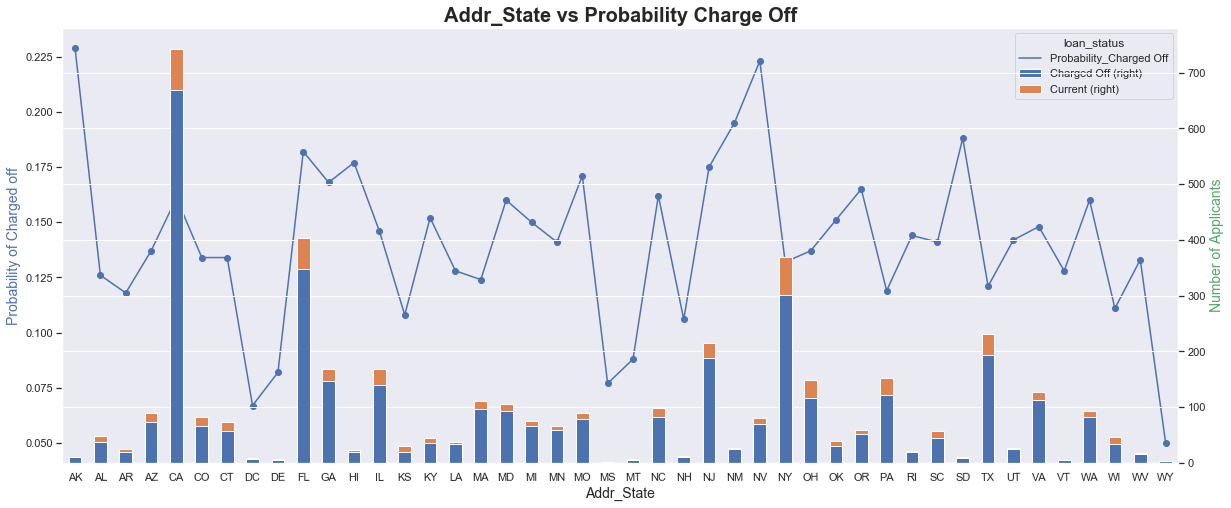

In [224]:
states = func(loan_filter_states,'addr_state')
display(states.tail(20))

bivariate_analysis(df =loan_filter_states,col ='addr_state')

Insight: There are multiple States/Provinces with high probability of charge,highest being 'NV' at approx 25%
----

------------------------------------------------

Purpose of Loan vs Probability Charge Off
----

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
purpose,,,,,
car,114,37,884,1035,0.110
credit_card,335,56,2653,3044,0.110
debt_consolidation,1862,329,9788,11979,0.155
educational,35,0,172,207,0.169
home_improvement,189,40,1176,1405,0.135
house,30,8,168,206,0.146
major_purchase,158,25,1242,1425,0.111
medical,71,5,364,440,0.161
moving,64,6,325,395,0.162


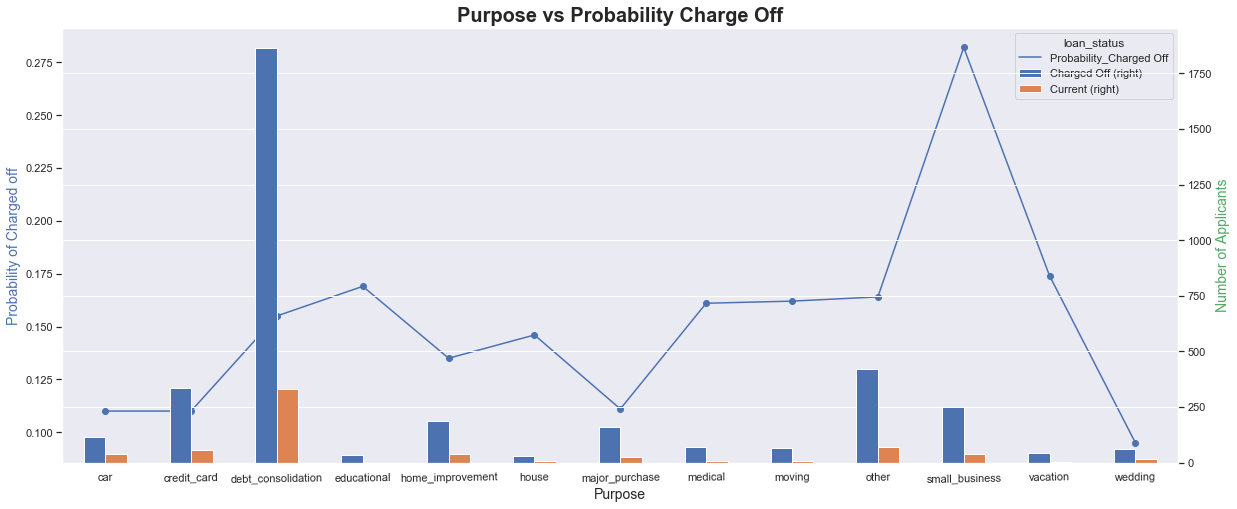

In [225]:
purpose = func(loan,'purpose')
display(purpose)

bivariate_analysis(df =loan,col ='purpose',stacked=False)

 Insights: Applicants who has taken the Loan for 'small business' has the highest probabilty of charge off of approx 27.5%. So bank should take extra caution like take some asset or guarentee while approving the loan for purpose of 'small business'
 -----

Grade/Subgrade vs Probability Charge Off
------

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
grade,,,,,
A,412,25,5833,6270,0.066
B,953,200,6382,7535,0.126
C,898,148,4103,5149,0.174
D,714,131,2439,3284,0.217
E,433,101,1048,1582,0.274
F,170,23,304,497,0.342
G,48,5,77,130,0.369


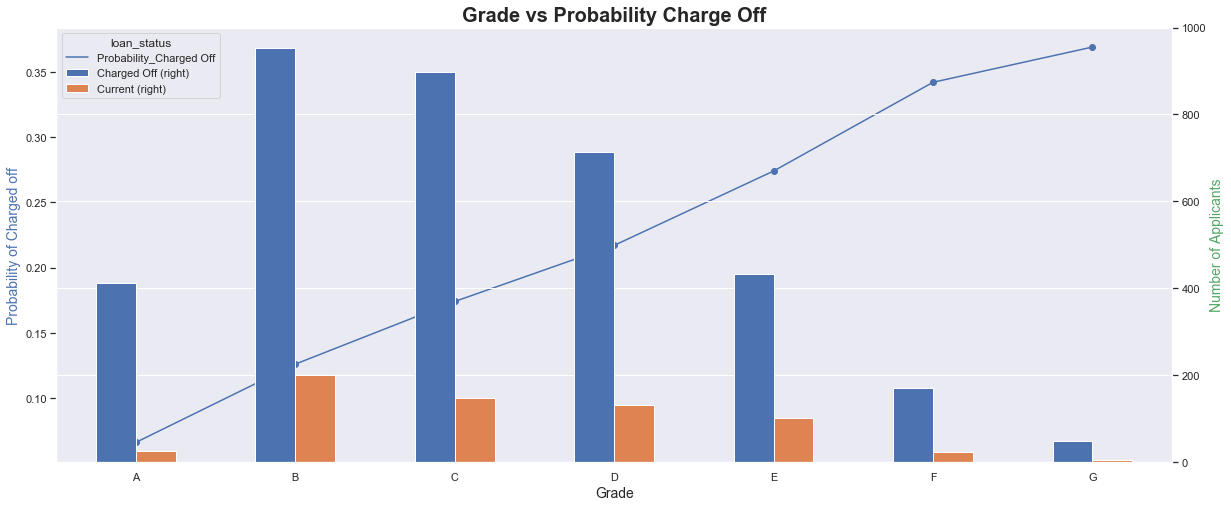

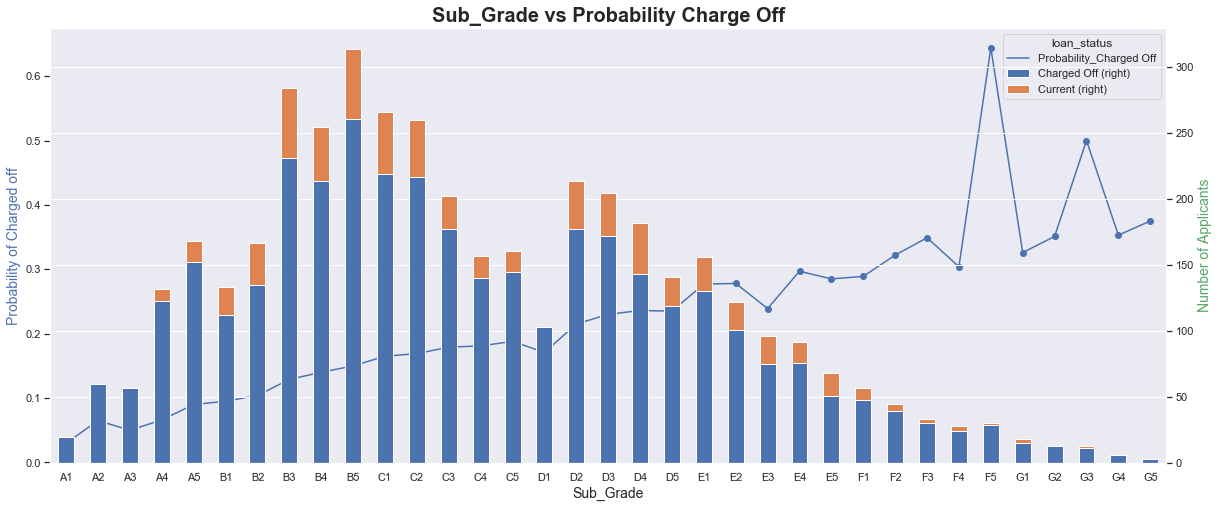

In [226]:
grade = func(loan,'grade')
display(grade)

bivariate_analysis(df =loan,col ='grade',stacked=False)
bivariate_analysis(df =loan,col ='sub_grade')

Insight: Grade B has the highest  probability for charged off
----


-------------------------------------
Interest rate Range vs term
---

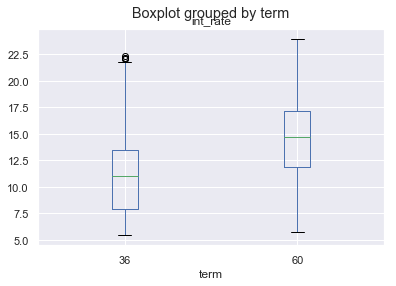

In [227]:
loan.boxplot(column='int_rate', by='term')
plt.show()

Insight:Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.
---
------------------------------
int_rate and Sub Grade
----

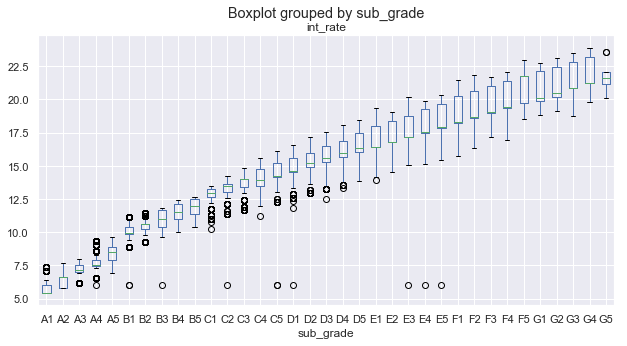

In [228]:
loan.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

Insight:Intrest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan.
----


----------------------------------
Employment Length vs Probability Charge Off
---

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
emp_length,,,,,
0,418,48,2478,2944,0.142
1,325,41,1853,2219,0.146
2,434,61,2590,3085,0.141
3,401,54,2351,2806,0.143
4,311,63,1884,2258,0.138
5,308,54,1776,2138,0.144
6,204,36,1179,1419,0.144
7,185,43,937,1165,0.159
8,126,31,742,899,0.140


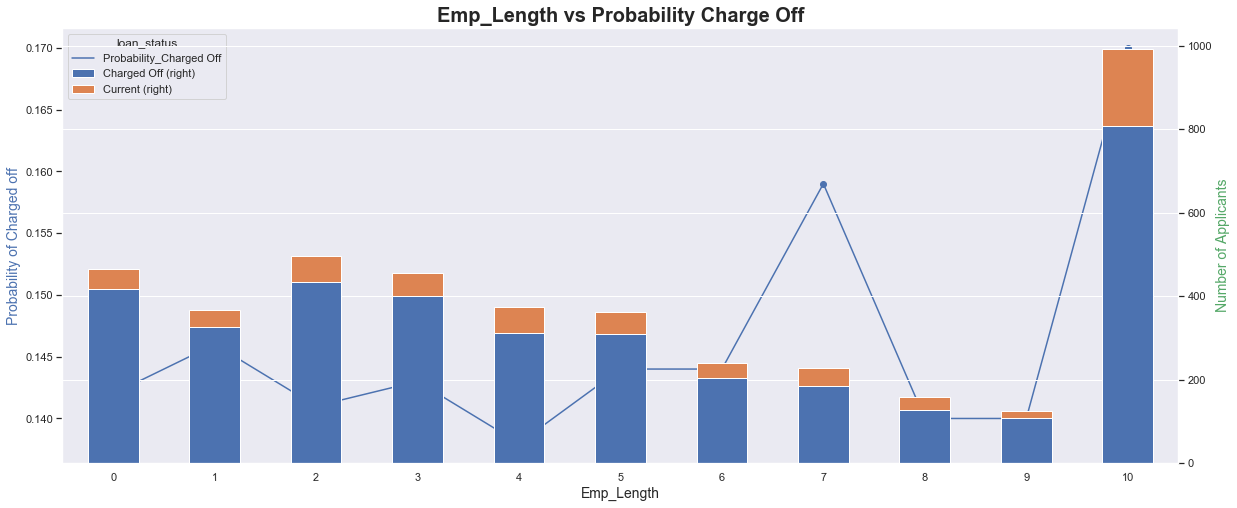

In [229]:
emp_length = func(loan,'emp_length')
display(emp_length)

bivariate_analysis(df =loan,col ='emp_length')


Insight: Applicants who are self employed & less than 1 year of experience are more probable of charged off.
---

Conclusion-
-------
Target Variable:---

loan_Status
---

------------------------------------------------------------------------------

Top-5 Major variables to consider for loan prediction:
-----
Purpose

Emp_Length

Grade

Int_Rate

Term